In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Reading in dataset, setting DATE to be datetime (and not an object)
data = pd.read_csv('seattleWeather_1948-2017.csv', parse_dates=[0])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null datetime64[ns]
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 998.2+ KB


In [4]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [5]:
# separate test & train data between 1950 - 2009 (test) and 2010 - 2017 (train)

test = data[(data['DATE'] >= '1950-01-01') & (data['DATE'] < '2010-01-01')]
train = data[(data['DATE'] >= '2010-01-01') & (data['DATE'] < '2018-01-01')]

In [6]:
print(test.info())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21915 entries, 731 to 22645
Data columns (total 5 columns):
DATE    21915 non-null datetime64[ns]
PRCP    21912 non-null float64
TMAX    21915 non-null int64
TMIN    21915 non-null int64
RAIN    21912 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2905 entries, 22646 to 25550
Data columns (total 5 columns):
DATE    2905 non-null datetime64[ns]
PRCP    2905 non-null float64
TMAX    2905 non-null int64
TMIN    2905 non-null int64
RAIN    2905 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 136.2+ KB
None


In [7]:
print(train.isnull().sum())
print(test.isnull().sum())

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64
DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64


In [8]:
test = test.dropna()

In [9]:
print(train.RAIN.value_counts())
print(test.RAIN.value_counts()).plot

False    1605
True     1300
Name: RAIN, dtype: int64
False    12628
True      9284
Name: RAIN, dtype: int64


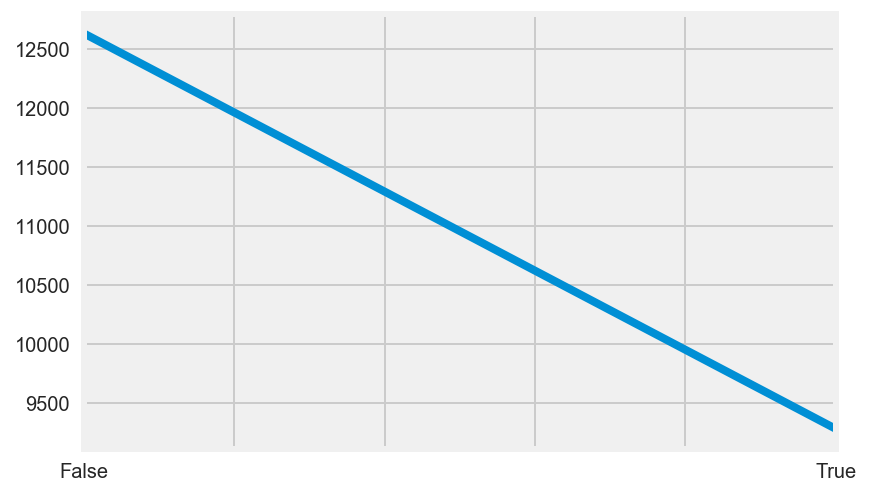

In [32]:
test.RAIN.value_counts().plot()

In [10]:
train[train['PRCP'].isnull()]

,DATE,PRCP,TMAX,TMIN,RAIN


In [11]:
train[train['RAIN'].isnull()]

,DATE,PRCP,TMAX,TMIN,RAIN


In [12]:
train[(train.PRCP > 0) & (train.RAIN == False)]

# if we're trying to predict Rain, realistically we should remove PRCP otherwise it's 100% accurate.

,DATE,PRCP,TMAX,TMIN,RAIN


In [13]:
train[(train.PRCP == 0) & (train.RAIN == True)]

,DATE,PRCP,TMAX,TMIN,RAIN


In [14]:
train[(train.PRCP > 0) & (train.RAIN == False)]

,DATE,PRCP,TMAX,TMIN,RAIN


## EDA

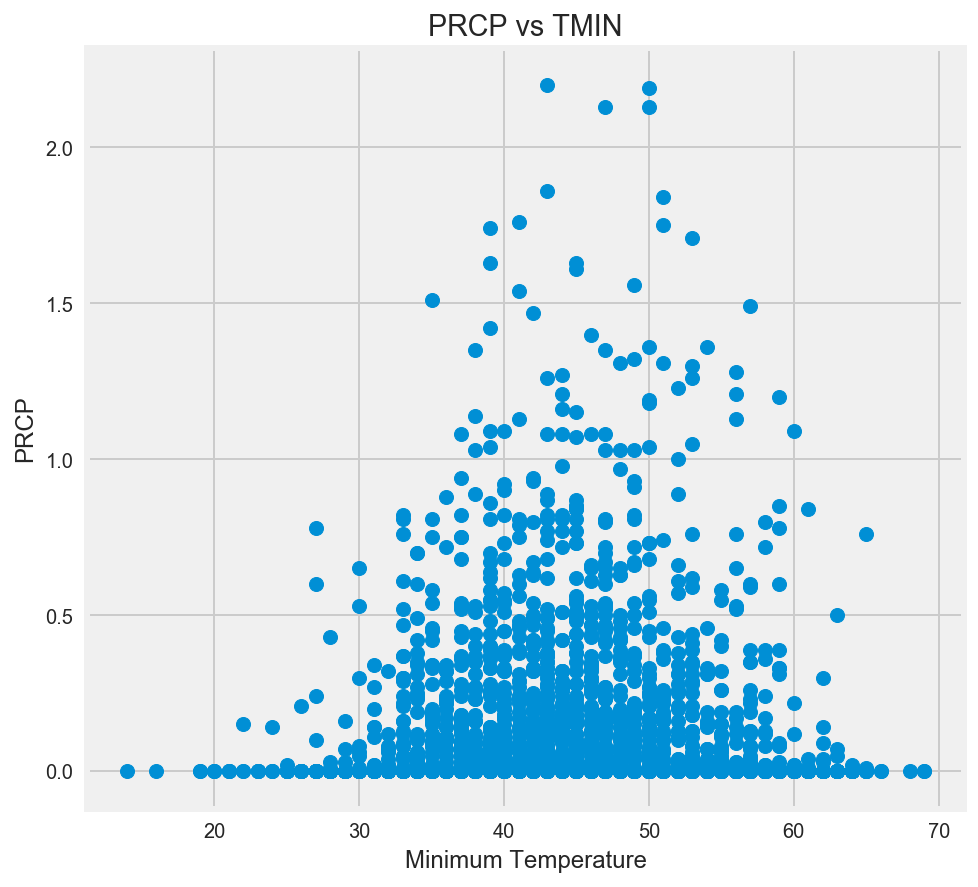

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMIN',y='PRCP',data=train)
plt.xlabel('Minimum Temperature')
plt.ylabel('PRCP')
plt.title('PRCP vs TMIN')

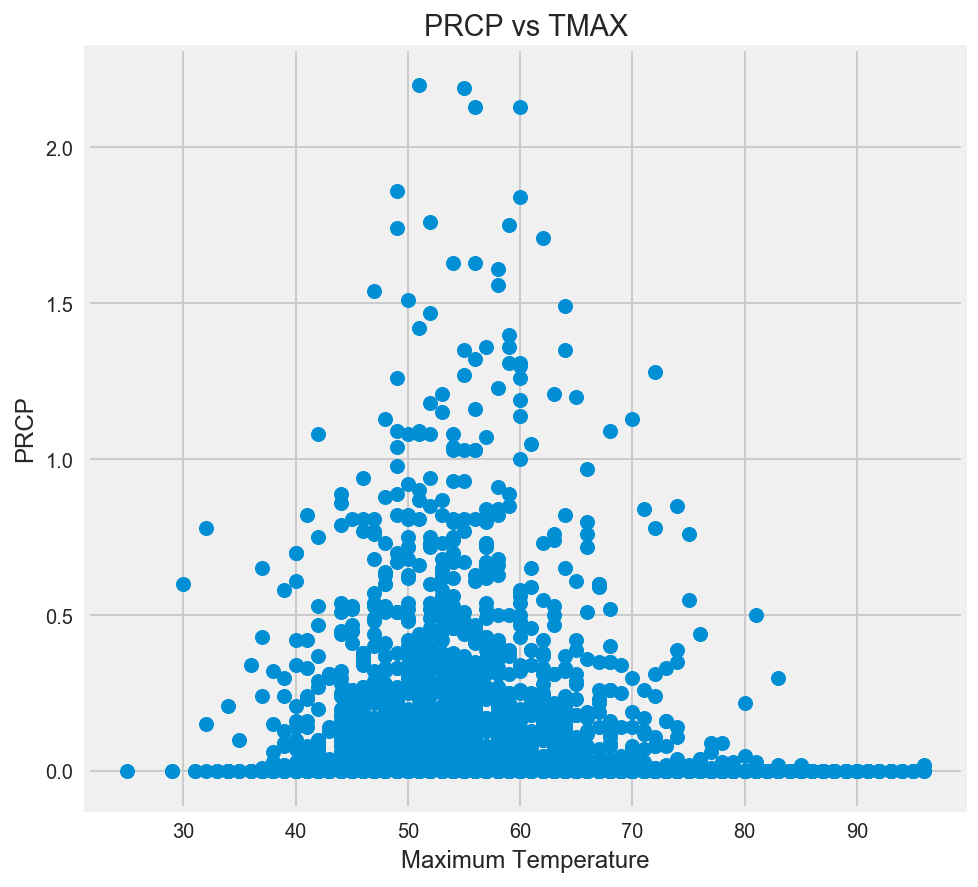

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(x='TMAX',y='PRCP', data=train)
plt.xlabel('Maximum Temperature')
plt.ylabel('PRCP')
plt.title('PRCP vs TMAX')

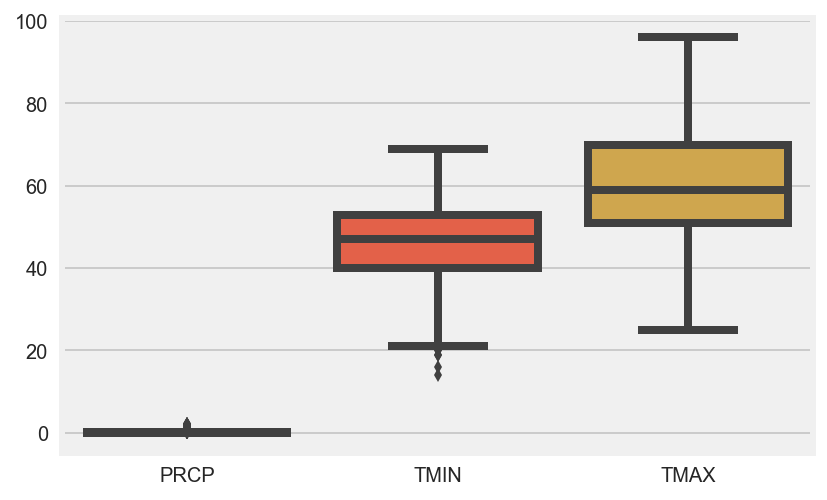

In [17]:
sns.boxplot(data=train[['PRCP','TMIN','TMAX']])


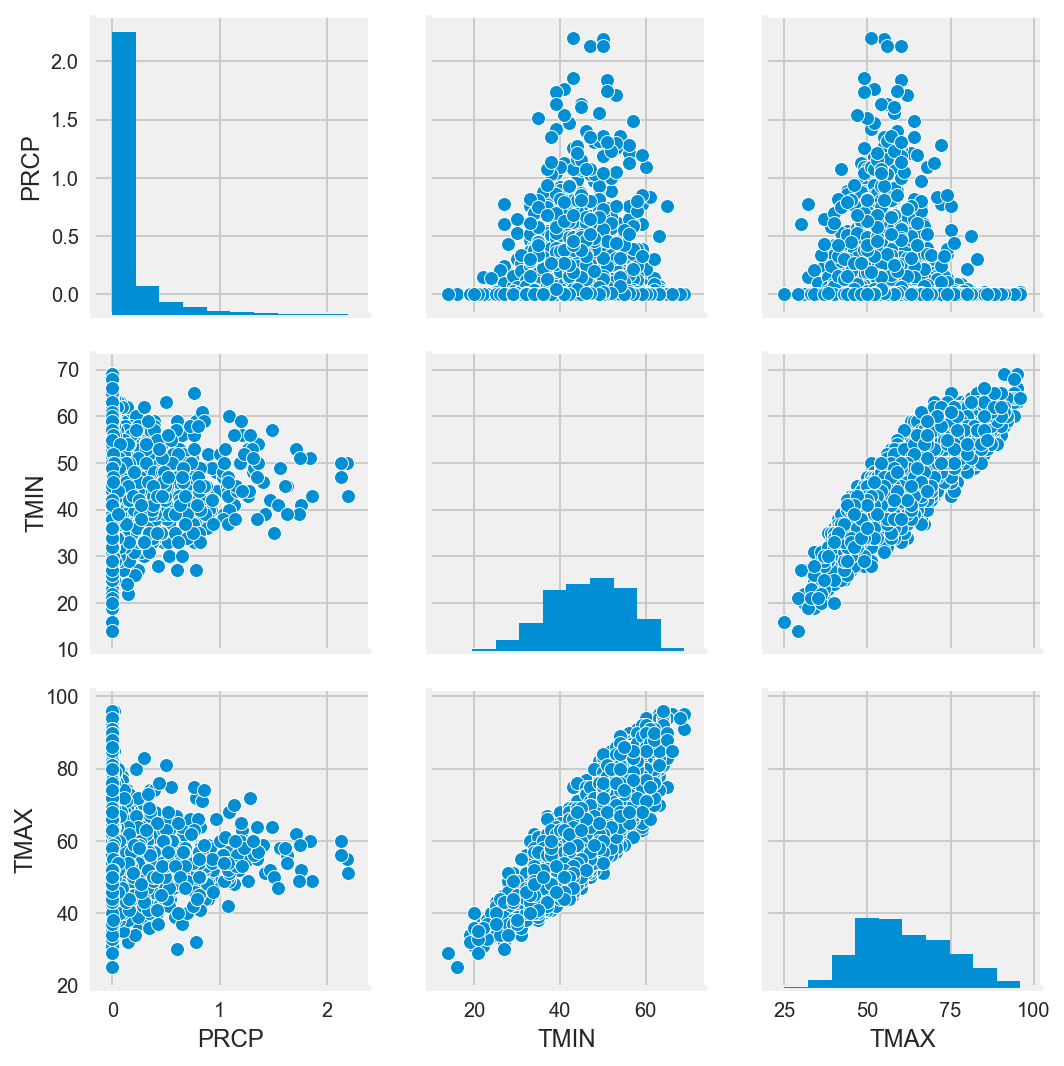

In [31]:
sns.pairplot(data=train[['PRCP','TMIN','TMAX']])

In [25]:
print(x_train.shape)
print(y_train.shape)

(2905, 3)
(2905,)


In [26]:
print(x_test.shape)
print(y_test.shape)

(2905, 3)
(21912,)


## Logistic Regression time

In [27]:
# create X & Y train tests.

x_train = train[['PRCP','TMAX','TMIN']]
y_train = train['RAIN'].astype('int') # LR doesn't like object based Y

x_test = test[['PRCP','TMAX','TMIN']]
y_test = test['RAIN'].astype('int') # LR doesn't like object based Y


In [28]:
lr = LogisticRegression()

#lr = sklearn.linear_model.LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)


0.87696239503468421

In [ ]:
sorted(zip(lr.coef_[0], x_train))

###  Try a gridsearch for parameters 

In [29]:
%%time
import sklearn.model_selection
lr_grid = sklearn.model_selection.GridSearchCV(
    sklearn.linear_model.LogisticRegression(),
    param_grid = {'C': [0.0001, 0.005, 0.002, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
    cv=3,
 )
# can we improve on this with a Grid Search?

CPU times: user 52 µs, sys: 6 µs, total: 58 µs
Wall time: 58.9 µs


In [30]:
%%time
lr_grid.fit(x_train, y_train)
print lr_grid.score(x_train, y_train)
print lr_grid.best_params_
# this is higher yes, I'm assuming it's disregarding the TMIN & TMAX.
# still not as good if I just used 'PRCP' as only input.

0.994492254733
{'penalty': 'l2', 'C': 1000}
CPU times: user 8.78 s, sys: 41.1 ms, total: 8.82 s
Wall time: 8.86 s
